### MCAR (Missing Completely at Random)

* The missing data has no pattern and is completely random.
* Ignore small missing data, use mean/median imputation.

### MAR (Missing at Random)
* The missing data depends on other known variables, but not on the missing values themselves.
* Use predictive models to fill missing values (e.g., regression, KNN imputation).

###  MNAR (Missing Not at Random)

* The missing data depends on the missing value itself, meaning there is a reason why it's missing. 
* Requires deeper investigation, sometimes needs domain expertise or external data sources.

In [1]:
import seaborn as sns

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.shape

(891, 15)

In [8]:
df.dropna().shape

(182, 15)

* Results in huge loss of data

In [9]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


##### IMputation techniques

##### Mean value Imputation
* * Works well with normally distributed data

<AxesSubplot:xlabel='age', ylabel='Count'>

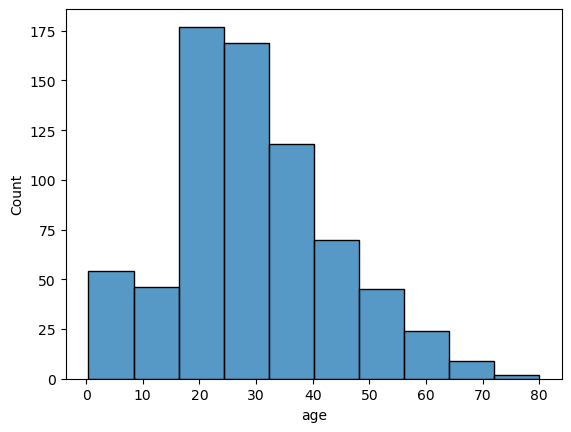

In [13]:
sns.histplot(df['age'] , bins=10)

In [14]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [20]:
df[['Age_mean' , 'age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### Median Imputaiion
* Works well with left skewed or right skewed data

In [24]:
df['Age_median']=df['age'].fillna(df['age'].median())

In [25]:
df[['Age_median' , 'age']]

,Age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


## Mode Imputation 
* worls for categorical values

In [27]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [28]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()

In [37]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [39]:
df[['embarked_mode' , 'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C
